In [1]:
# data manipulation
import pandas as pd
import numpy as np
import os
import sys

import logging 
logging.basicConfig(format='%(message)s')
log = logging.getLogger()
log.setLevel(logging.INFO)

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#RDKit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D

try:
    import adjustText
except ModuleNotFoundError:
    !pip install adjustText
    
from adjustText import adjust_text


try:
    import mlxtend
except ModuleNotFoundError:
    !pip install mlxtend
    
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# own module
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pythia import scaling
from pythia import fingerprints_generation as fp
from pythia import molecules_and_structures as mi

random_seed = 10459
np.random.seed = random_seed
log.info(f"Random seed fixed as {random_seed}")

Enabling RDKit 2023.09.4 jupyter extensions
Random seed fixed as 10459


In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 10)

First load the data

In [3]:
data = pd.read_csv("First_set_full.csv")

In [4]:
data

,Reaction,Substrate,Catalyst,Solvent,Solvent code,Temperature,ee,DDG,Paper
0,0,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,14,0.569810,Nature 2009
1,1,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,41,1.761325,Nature 2009
2,2,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,30,1.251493,Nature 2009
3,3,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,86,5.229434,Nature 2009
4,4,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,58,2.678563,Nature 2009
5,5,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,90,5.952686,Nature 2009
6,6,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,77,4.125533,Nature 2009
7,7,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,97,8.459866,Nature 2009
8,8,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,93,6.705437,Nature 2009
9,9,CCC(CC)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,96,7.867979,Nature 2009


Check for duplicates

In [5]:
data.duplicated().sum()

0

if you have duplicates in your data we suggest you pay close attention to which entry you are going to keep. also make sure you check that the same catalyst, substrate and conditions are not tested experimentally more than once but produce different ddg values. in this case, you should make sure to keep the most reliable entry according to your judgment.

In [6]:
df_final = data.drop_duplicates()

In [7]:
df_final

,Reaction,Substrate,Catalyst,Solvent,Solvent code,Temperature,ee,DDG,Paper
0,0,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,14,0.569810,Nature 2009
1,1,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...,toluene,0,-30.0,41,1.761325,Nature 2009
2,2,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,30,1.251493,Nature 2009
3,3,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,86,5.229434,Nature 2009
4,4,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,58,2.678563,Nature 2009
5,5,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,90,5.952686,Nature 2009
6,6,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,77,4.125533,Nature 2009
7,7,C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,97,8.459866,Nature 2009
8,8,CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,93,6.705437,Nature 2009
9,9,CCC(CC)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2,CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...,toluene,0,-30.0,96,7.867979,Nature 2009


Explore the data

How many unique target (ddg) values do we have?

In [8]:
len(df_final.DDG.unique())

70

How often does each occure?

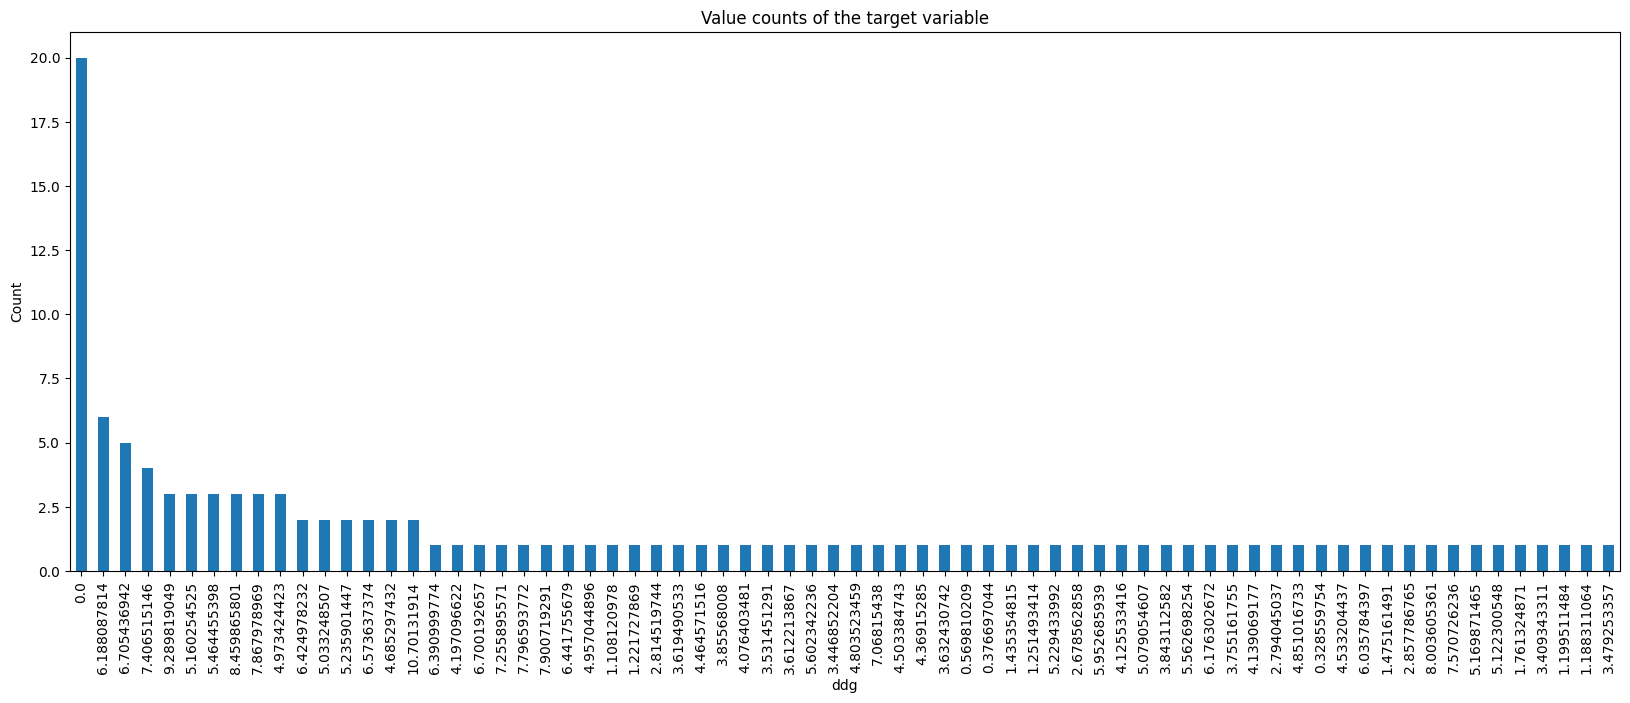

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(20.0,7.0)

df_final.DDG.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("ddg")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Grouping them into a histogram to better understand how often they occure, change bins as you wish

(array([23.,  8.,  4., 14., 23., 15., 17., 10.,  3.,  2.]),
 array([ 0.        ,  1.07013191,  2.14026383,  3.21039574,  4.28052766,
         5.35065957,  6.42079148,  7.4909234 ,  8.56105531,  9.63118723,
        10.70131914]),
 <BarContainer object of 10 artists>)

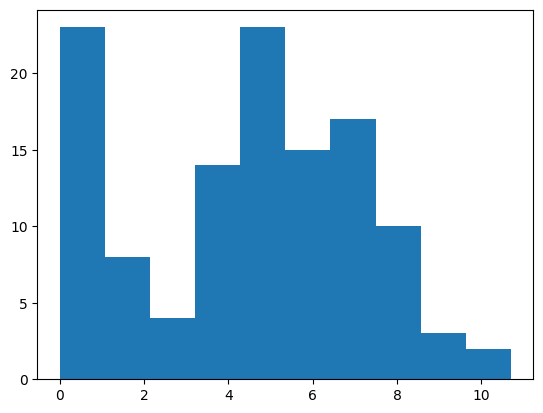

In [10]:
plt.hist(df_final.DDG, bins = 10)

How about the frequency the catalysts and the substrates occure?

In [11]:
len(df_final.Substrate.unique())

63

In [12]:
uniqueSubstrates = df_final.Substrate.unique()

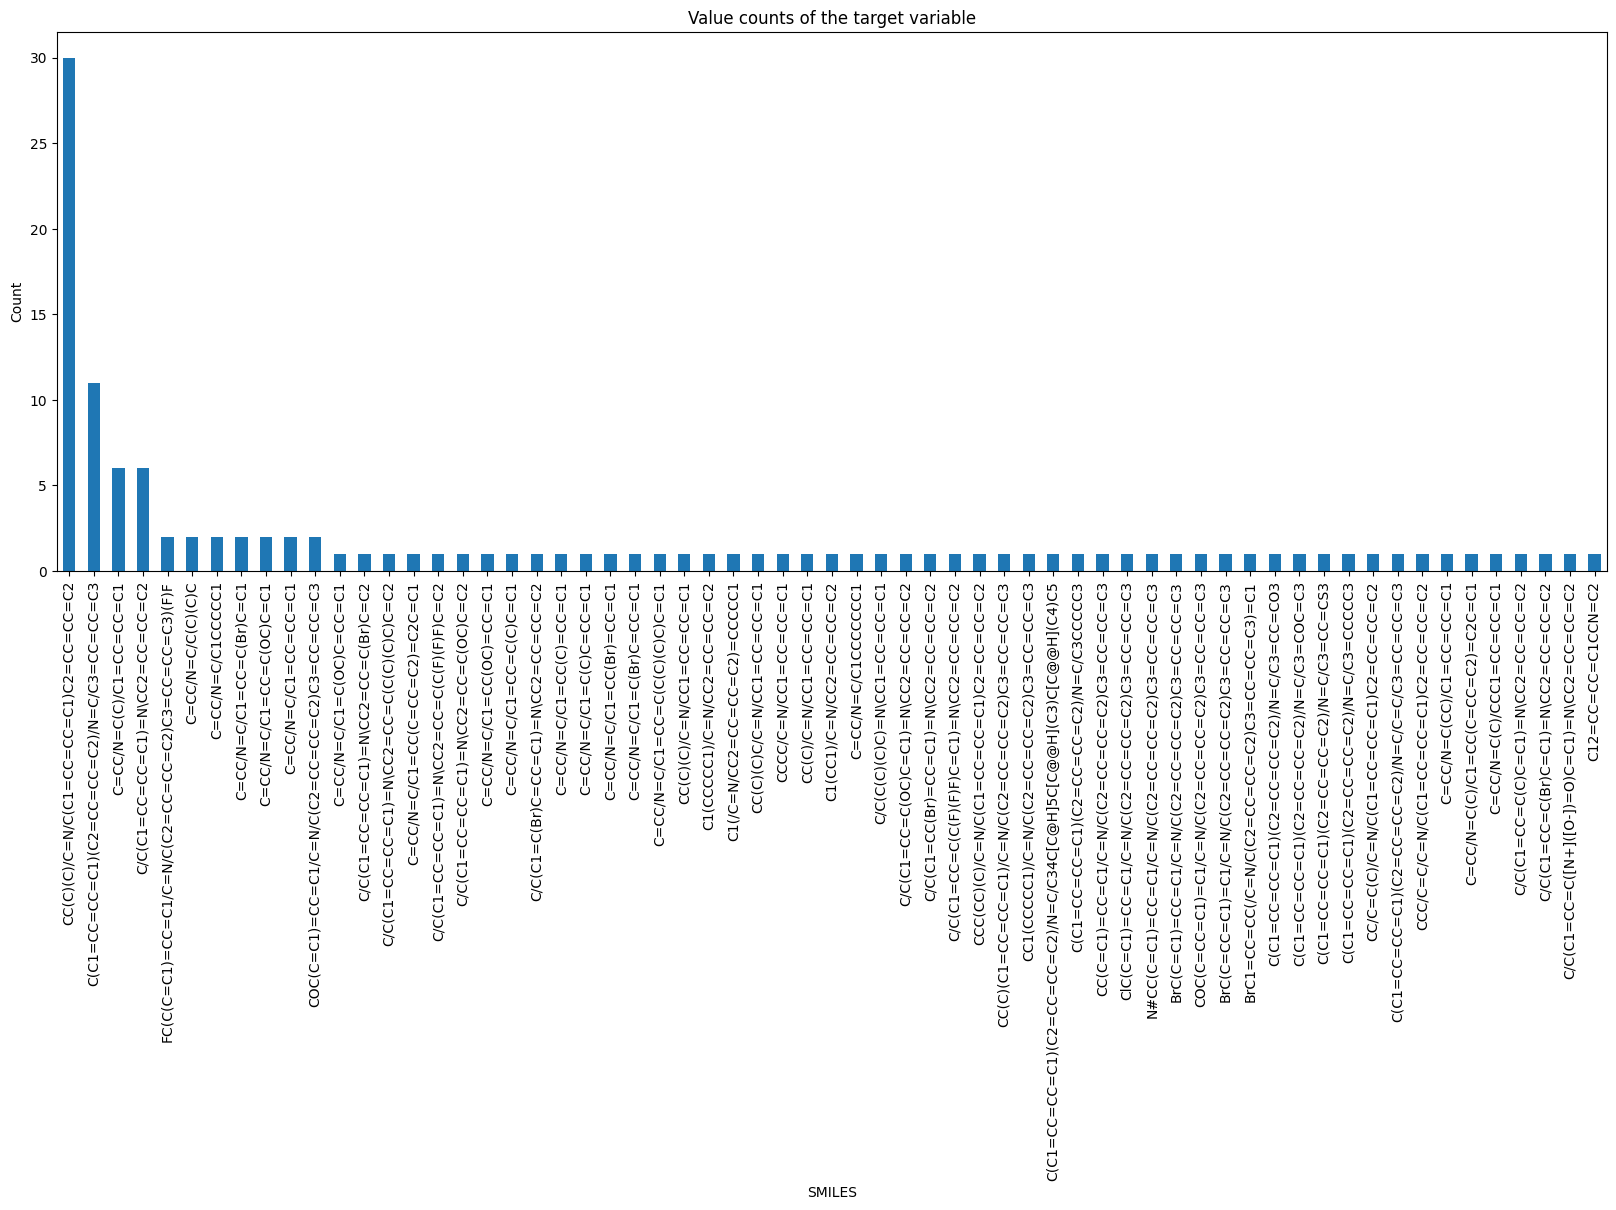

In [13]:
fig,ax = plt.subplots()
fig.set_size_inches(20.0,7.0)

df_final.Substrate.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("SMILES")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [14]:
len(df_final.Catalyst.unique())

19

In [15]:
uniqueCatalysts = df_final.Catalyst.unique()

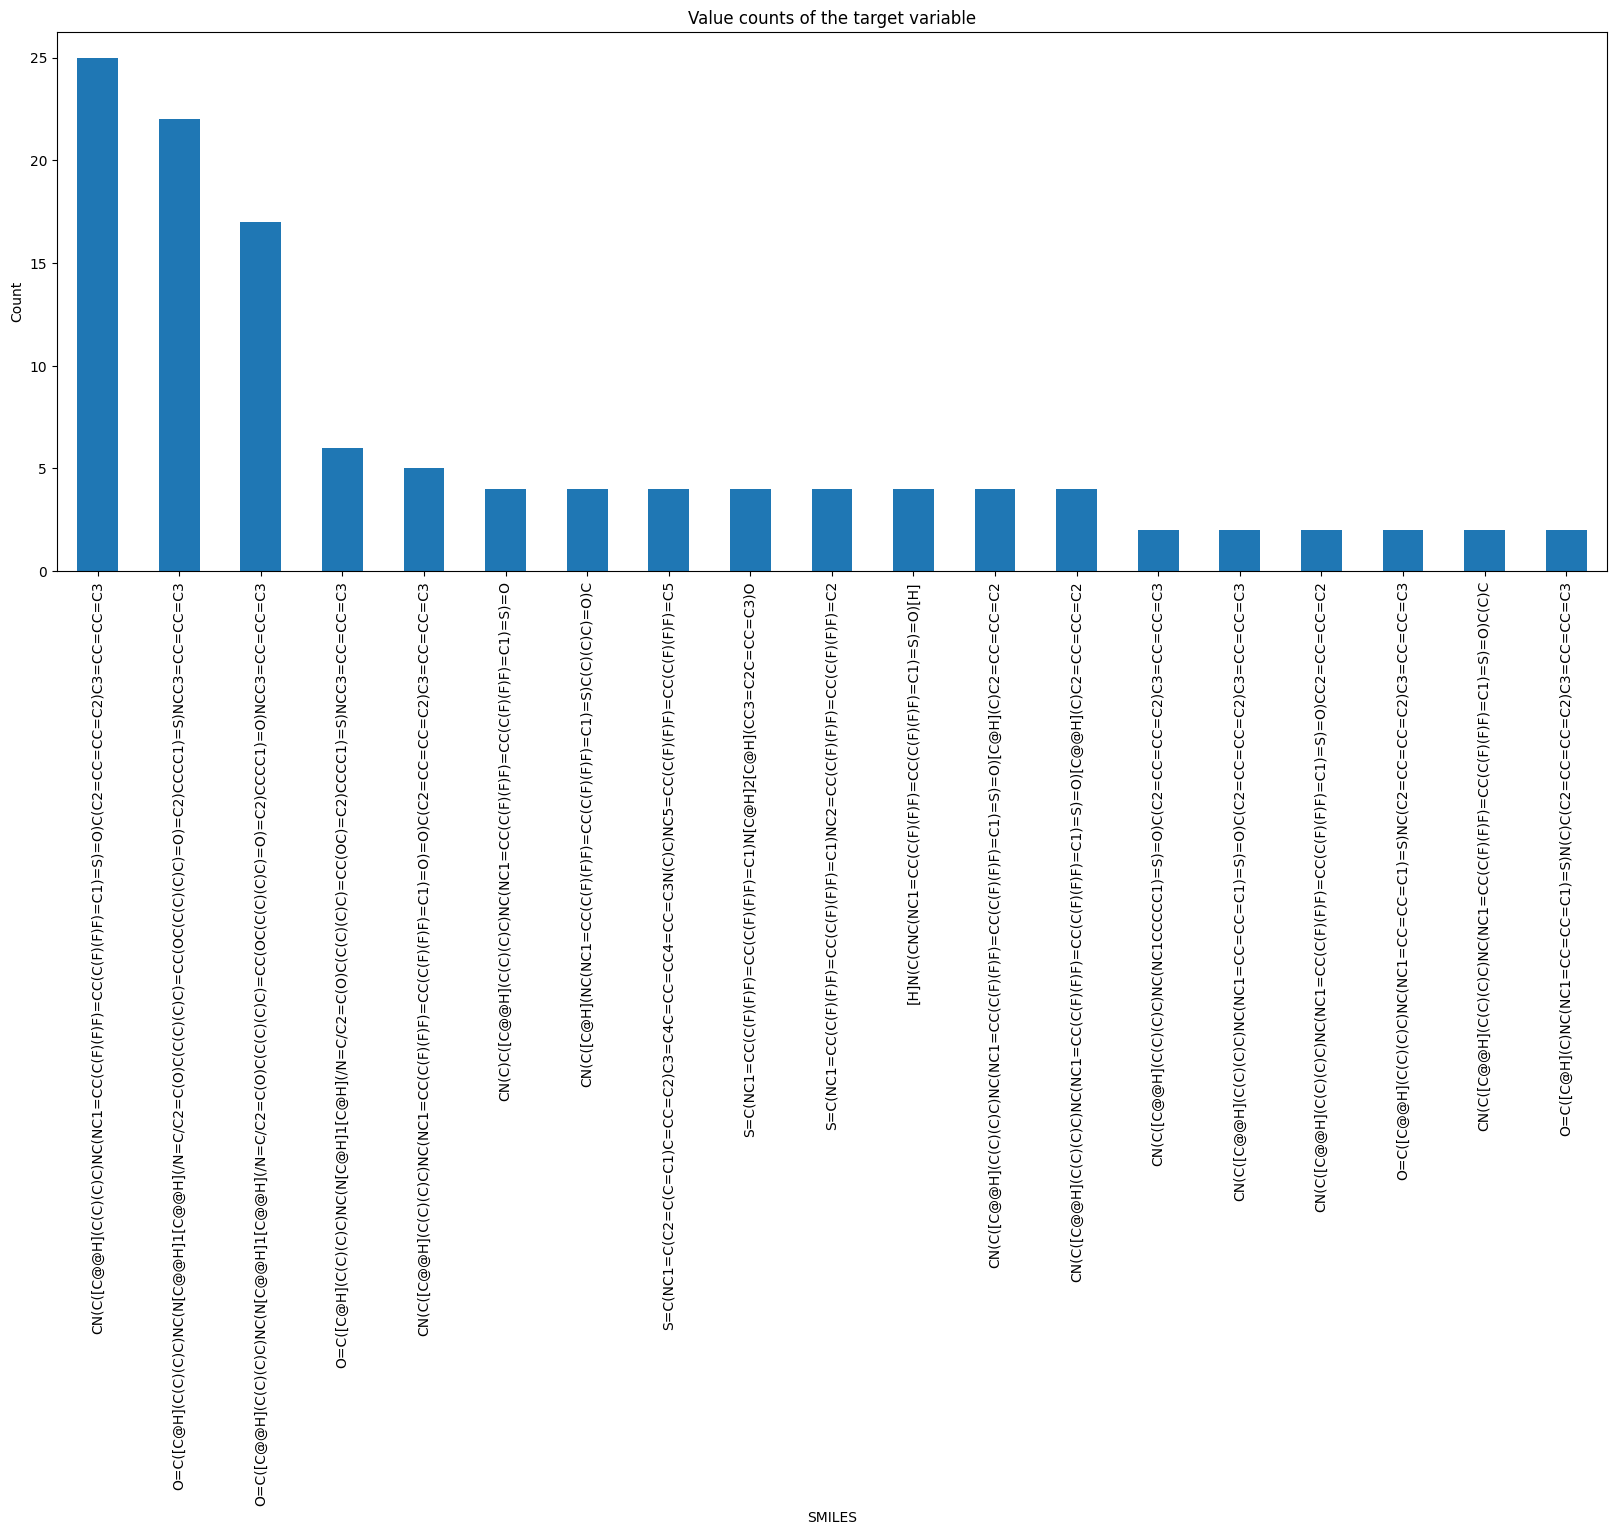

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(20.0,7.0)

df_final.Catalyst.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("SMILES")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Lets check the tanimoto similarity between the molecules. This will show us how diverse the chemical space is.

First we calculate the morgan fingerprints. If you wish you can use other type of fingerprints like rdkit. for more options check the finger_prints module.

In [17]:
fingerSubstrates, fingerSubstrates_df = fp.morgan_fingerprints(uniqueSubstrates)

In [18]:
fingerCatalysts, fingerCatalysts_df = fp.morgan_fingerprints(uniqueCatalysts)

Now we get the average similarity of the substrates

In [19]:
average=[]
for s in range(len(fingerSubstrates)):
    ts = fp.bulk_similarity(fingerSubstrates[s], fingerSubstrates)
    average.append(np.average(np.array(ts["tanimoto_similarity"])))
    log.info(ts)
    log.info(average)

/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7       7  [1, 0, 1, 0, 1, 0, 0, 0, 0,

[0.3947150718126012]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7       7  [1, 0,

[0.3947150718126012, 0.4313723086270798]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5   

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1,

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4    

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 1, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_referenc

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                              

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number          

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_target

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(f

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creatin

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged neste

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndar

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarni

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: Vi

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016]
/Users/matina/Desktop/PythiaChem

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923]
/Users/matin

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

[0.3947150718126012, 0.4313723086270798, 0.3803654700254566, 0.3673961786808027, 0.3733537254940938, 0.3391920692594003, 0.36531850481262357, 0.3747976060278965, 0.40697918196243843, 0.40936185153314275, 0.37646394676354344, 0.3752640428313689, 0.40936185153314275, 0.35961468273516, 0.3891728104084204, 0.39727390751414743, 0.32228226574455665, 0.35061750591105834, 0.32228226574455665, 0.34070135891480385, 0.3637555261858124, 0.35416743471895334, 0.3660455609971758, 0.40125253786006543, 0.3945173166212982, 0.3560632048047102, 0.33393886047008386, 0.41876453194875024, 0.39490860526811006, 0.39766702309626933, 0.3212523582731132, 0.36469639449899166, 0.36940884649005795, 0.3860940957909363, 0.37795985262201004, 0.35421986635179675, 0.36469639449899166, 0.36940884649005795, 0.3792951647769704, 0.39766702309626933, 0.42887390210051496, 0.35100564398447737, 0.37799876697615914, 0.3766142177054585, 0.21179791812796608, 0.22196545358823452, 0.37054715637878016, 0.3616354352904923, 0.3784627806

and here are the substrates sorted according to similarity

In [20]:
average
average2 = enumerate(average)
average3 = sorted(average2, key=lambda x: x[1])
average3

[(44, 0.21179791812796608),
 (61, 0.21179791812796608),
 (45, 0.22196545358823452),
 (30, 0.3212523582731132),
 (16, 0.32228226574455665),
 (18, 0.32228226574455665),
 (56, 0.3311675819689965),
 (26, 0.33393886047008386),
 (5, 0.3391920692594003),
 (19, 0.34070135891480385),
 (62, 0.3412985357734757),
 (17, 0.35061750591105834),
 (41, 0.35100564398447737),
 (21, 0.35416743471895334),
 (35, 0.35421986635179675),
 (25, 0.3560632048047102),
 (55, 0.35829903646991357),
 (13, 0.35961468273516),
 (47, 0.3616354352904923),
 (20, 0.3637555261858124),
 (60, 0.3639058603161383),
 (58, 0.3646357195912761),
 (31, 0.36469639449899166),
 (36, 0.36469639449899166),
 (6, 0.36531850481262357),
 (22, 0.3660455609971758),
 (3, 0.3673961786808027),
 (53, 0.3680338886202245),
 (32, 0.36940884649005795),
 (37, 0.36940884649005795),
 (46, 0.37054715637878016),
 (4, 0.3733537254940938),
 (7, 0.3747976060278965),
 (11, 0.3752640428313689),
 (10, 0.37646394676354344),
 (43, 0.3766142177054585),
 (57, 0.37715023

Now we get the average similarity for the catalysts

In [21]:
average=[]
for s in range(len(fingerCatalysts)):
    ts = fp.bulk_similarity(fingerCatalysts[s], fingerCatalysts)
    average.append(np.average(np.array(ts["tanimoto_similarity"])))
    log.info(ts)
    log.info(average)

/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
7       7  [1, 0, 1, 0, 1, 0, 0, 0, 1,

[0.5801228547304224, 0.5628864823497234, 0.5716584121742847]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
5       5  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
6       6  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

[0.5801228547304224, 0.5628864823497234, 0.5716584121742847, 0.5716584121742847, 0.5917645576800654, 0.2300159776048755]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
1       1  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
2       2  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
3       3  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
4       4  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...   
5       5  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 

[0.5801228547304224, 0.5628864823497234, 0.5716584121742847, 0.5716584121742847, 0.5917645576800654, 0.2300159776048755, 0.32313062614983146, 0.5648542876678637, 0.4209357974496661]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4       4  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

[0.5801228547304224, 0.5628864823497234, 0.5716584121742847, 0.5716584121742847, 0.5917645576800654, 0.2300159776048755, 0.32313062614983146, 0.5648542876678637, 0.4209357974496661, 0.46988714158083356, 0.512724879493674, 0.4085241407454816]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3       3  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0.5801228547304224, 0.5628864823497234, 0.5716584121742847, 0.5716584121742847, 0.5917645576800654, 0.2300159776048755, 0.32313062614983146, 0.5648542876678637, 0.4209357974496661, 0.46988714158083356, 0.512724879493674, 0.4085241407454816, 0.31335884342427756, 0.3107508801021557, 0.44160774506121]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2       2  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

[0.5801228547304224, 0.5628864823497234, 0.5716584121742847, 0.5716584121742847, 0.5917645576800654, 0.2300159776048755, 0.32313062614983146, 0.5648542876678637, 0.4209357974496661, 0.46988714158083356, 0.512724879493674, 0.4085241407454816, 0.31335884342427756, 0.3107508801021557, 0.44160774506121, 0.4184026045772564, 0.36499858262234175, 0.5801228547304224]
/Users/matina/Desktop/PythiaChem/pythia/fingerprints_generation.py:292: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([[i for i in range(0, len(fp_targets))],[fp]*len(fp_targets), fp_targets, tani_similarity]).T
   number                                       fp_reference  \
0       0  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1       1  [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...

In [22]:
average
average2 = enumerate(average)
average3 = sorted(average2, key=lambda x: x[1])
average3

[(5, 0.2300159776048755),
 (13, 0.3107508801021557),
 (12, 0.31335884342427756),
 (6, 0.32313062614983146),
 (16, 0.36499858262234175),
 (11, 0.4085241407454816),
 (15, 0.4184026045772564),
 (8, 0.4209357974496661),
 (18, 0.42916844289951384),
 (14, 0.44160774506121),
 (9, 0.46988714158083356),
 (10, 0.512724879493674),
 (1, 0.5628864823497234),
 (7, 0.5648542876678637),
 (2, 0.5716584121742847),
 (3, 0.5716584121742847),
 (0, 0.5801228547304224),
 (17, 0.5801228547304224),
 (4, 0.5917645576800654)]

PCA can help understand the chemical space under study, although when used with fingerprints it is not particulary intuitive it can allow for the visualisation of molecular similarities and identify potential clusters or trends giving insights in the diversity of the dataset 

In [23]:
# We start with the substrate space
scaler = MinMaxScaler()
data_sub_rescaled = scaler.fit_transform(fingerSubstrates_df)

In [32]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_sub_rescaled)

# Create a DataFrame for Plotly
df = pd.DataFrame({'PC1': principal_components[:, 0], 'PC2': principal_components[:, 1], 'Label': [str(i+1) for i in range(len(principal_components))]})

# Create an interactive scatter plot
fig = px.scatter(df, x='PC1', y='PC2', text='Label', title='PCA of Morgan Fingerprints',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white',  # Set background to white
                 )

# Adjust annotation position
fig.update_traces(textposition='bottom right', textfont_size=1, marker=dict(size=8, line=dict(color='black', width=1)))

# Configure hover labels
fig.update_layout(hoverlabel=dict(bgcolor='white', font_size=10))

# Hide text labels by default
fig.update_traces(hoverinfo='skip')

# Show the plot
fig.show()


In [25]:
# Here we do the same for the catalyst space
scaler = MinMaxScaler()
data_cat_rescaled = scaler.fit_transform(fingerCatalysts_df)

In [31]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you already have data_cat_rescaled
# data_cat_rescaled = ...

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_cat_rescaled)

# Create a DataFrame for Plotly
df = pd.DataFrame({'PC1': principal_components[:, 0], 'PC2': principal_components[:, 1], 'Label': [str(i+1) for i in range(len(principal_components))]})

# Create an interactive scatter plot
fig = px.scatter(df, x='PC1', y='PC2', text='Label', title='PCA of Morgan Fingerprints',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white',  # Set background to white
                 )

# Adjust annotation position
fig.update_traces(textposition='bottom right', textfont_size=1, marker=dict(size=8, line=dict(color='black', width=1)))

# Configure hover labels
fig.update_layout(hoverlabel=dict(bgcolor='white', font_size=10))

# Hide text labels by default
fig.update_traces(hoverinfo='skip')

# Show the plot
fig.show()


In this example the target values are scalled as we are exploring ddg in kcal/mol. In other cases, target values need to be normalized. Here are some examples on how to do that

In [ ]:
# scale a pandas dataframe using autoscaling/z-scaling
scaling.autoscale(df_final.DDG)

In [ ]:
# scale a pandas dataframe using min max scaling
scaling.minmaxscale(df_final.DDG)

In [55]:
# scale a pandas dataframe using logarithmic scaling, chose between 2 or 10
scaling.logarithm2(df_final.DDG)

/Users/matina/miniconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.811447
1      0.816661
2      0.323651
3      2.386655
4      1.421459
5      2.573541
6      2.044581
7      3.080635
8      2.745331
9      2.975993
10     2.344560
11     2.888795
12     2.745331
13     1.942275
14     3.419717
15     3.215650
16     3.215650
17     3.215650
18     2.975993
19     2.745331
20     3.419717
21     2.475785
22     3.080635
23     2.683692
24     2.745331
25     3.080635
26     2.888795
27     2.888795
28     2.626743
29     2.888795
30     1.908875
31     2.049306
32     1.482355
33     2.228141
34     0.521407
35     2.278287
36     2.331490
37     2.450078
38     2.450078
39     2.180531
40     2.593541
41     2.331490
42     0.560873
43     1.514898
44     2.450078
45     2.388438
46     2.228141
47     2.388438
48     2.745331
49     2.975993
50     2.683692
51     3.000650
52     2.920432
53     2.370128
54     2.356792
55     1.798778
56     1.769494
57     0.262447
58     0.248913
59    -1.605772
60    -1.408523
61     1.852883
62     1

In [56]:
scaling.logarithm10(df_final.DDG)

/Users/matina/miniconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.244270
1      0.245839
2      0.097429
3      0.718455
4      0.427902
5      0.774713
6      0.615480
7      0.927363
8      0.826427
9      0.895863
10     0.705783
11     0.869614
12     0.826427
13     0.584683
14     1.029437
15     0.968007
16     0.968007
17     0.968007
18     0.895863
19     0.826427
20     1.029437
21     0.745286
22     0.927363
23     0.807872
24     0.826427
25     0.927363
26     0.869614
27     0.869614
28     0.790729
29     0.869614
30     0.574629
31     0.616903
32     0.446233
33     0.670737
34     0.156959
35     0.685833
36     0.701848
37     0.737547
38     0.737547
39     0.656405
40     0.780734
41     0.701848
42     0.168840
43     0.456030
44     0.737547
45     0.718991
46     0.670737
47     0.718991
48     0.826427
49     0.895863
50     0.807872
51     0.903286
52     0.879138
53     0.713480
54     0.709465
55     0.541486
56     0.532671
57     0.079004
58     0.074930
59    -0.483386
60    -0.424008
61     0.557773
62     0